# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Balkarn Gill

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [ ]:
from yellowbrick.datasets import load_concrete
from sklearn.model_selection import train_test_split

# Load the concrete dataset into the feature matrix X and target vector y
X, y = load_concrete()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X training shape: ", X_train.shape)
print("X testing shape: ", X_test.shape)
print("y training size: ", y_train.shape)
print("y testing size: ", y_test.shape)

X training shape:  (772, 8)
X testing shape:  (258, 8)
y training size:  (772,)
y testing size:  (258,)


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Importing decision tree, random forest, and gradient boosting
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd

# Instantiate the models with max_depth=5 and additional parameters
models = {
    'DT': DecisionTreeRegressor(max_depth=5),
    'RF': RandomForestRegressor(max_depth=5, n_estimators=100),
    'GB': GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)
}

# Train the models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Calculate training and validation accuracy with cross-validation and mean squared error
results = {'Training Accuracy': {}, 'Validation Accuracy': {}}
for model_name, model in models.items():
    for dataset, X_data, y_data in [('Training', X_train, y_train), ('Validation', X_test, y_test)]:
        scores = -cross_val_score(model, X_data, y_data, scoring='neg_mean_squared_error', cv=5)
        avg_accuracy = scores.mean()
        results[dataset + ' Accuracy'][model_name] = avg_accuracy

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


    Training Accuracy  Validation Accuracy
DT          70.343527           101.126346
RF          45.338639            65.870466
GB          22.703811            48.841820


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [ ]:
# TO DO: ADD YOUR CODE HERE

# Importing decision tree, random forest, and gradient boosting
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd

# Instantiate the models with max_depth=5 and additional parameters
models = {
    'DT': DecisionTreeRegressor(max_depth=5),
    'RF': RandomForestRegressor(max_depth=5, n_estimators=100),
    'GB': GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)
}

# Train the models
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Calculate training and validation R2 score with cross-validation
results = {'Training R2 Score': {}, 'Validation R2 Score': {}}
for model_name, model in models.items():
    for dataset, X_data, y_data in [('Training', X_train, y_train), ('Validation', X_test, y_test)]:
        scores = cross_val_score(model, X_data, y_data, scoring='r2', cv=5)
        avg_r2_score = scores.mean()
        results[dataset + ' R2 Score'][model_name] = avg_r2_score

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


    Training R2 Score  Validation R2 Score
DT           0.741966             0.593765
RF           0.839556             0.739688
GB           0.919301             0.807729


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.

Linear models are often simpler and have linear relationships between features and the target variable. They may perform well when the relationship is approximately linear.
Tree-based models like Decision Trees, Random Forest, and Gradient Boosting can capture non-linear relationships and interactions between features. They tend to perform well when the data has non-linear patterns.
To compare the models, you should look at metrics like R2 score or mean squared error (MSE) and choose the model that performs better based on the specific dataset and its characteristics.

2. Out of the models you tested, which model would you select for this dataset and why?


In this specific scenario, I would opt for the Gradient Boosting model as it outperforms other models in terms of both training and validation accuracy. Its strong performance in validation accuracy indicates that it can make accurate predictions without overfitting, making it a reliable choice for this dataset.


3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

Adjust hyperparameters: Tune settings like tree depth and minimum samples.
Feature enhancement: Analyze feature relevance and create new informative features. Normalize scales if needed.

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?

From the examples, lectures provided in class, as well as online tools and libraries.

2. In what order did you complete the steps?

I completed the steps in the order they were listed.

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I used generative AI to better understand the questions and expectations for the solutions. The prompts were more or less the questions. I also used generative AI when I was experiencing errors, especially for steps 3-5. It helped me figure out what was going wrong.


4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I did have challenges remembering how to perform certain functions. I had to dig through some of the old examples or search online.

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [ ]:
import pandas as pd

# Define column headers as given in the dataset description
column_headers = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

# Load the wine dataset with defined column headers
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names=column_headers)

# Split the dataset into feature matrix X and target vector y
X = wine_data.drop("Class", axis=1)
y = wine_data["Class"]

# Print the size and type of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X type:", type(X))
print("y type:", type(y))

X shape: (178, 13)
y shape: (178,)
X type: <class 'pandas.core.frame.DataFrame'>
y type: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [ ]:
# TO DO: ADD YOUR CODE HERE

# Print the first five rows of the dataset
print(wine_data.head())



   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [ ]:
# TO DO: ADD YOUR CODE HERE

# Check for missing values in the dataset
missing_values = wine_data.isnull().sum()

# If there are missing values, you can choose an appropriate method to handle them
if missing_values.any():
    # Replace missing values with the mean of the respective column (you can choose another method as needed)
    wine_data.fillna(wine_data.mean(), inplace=True)

# Check if missing values have been filled
missing_values_after_fill = wine_data.isnull().sum()

# Print the results
print("Missing values before fill:")
print(missing_values)
print("\nMissing values after fill:")
print(missing_values_after_fill)


Missing values before fill:
Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Missing values after fill:
Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline      

How many samples do we have of each type of wine?

In [ ]:
# TO DO: ADD YOUR CODE HERE

# Count the number of samples for each class (type of wine)
wine_class_counts = wine_data['Class'].value_counts()

# Print the counts
print(wine_class_counts)


2    71
1    59
3    48
Name: Class, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

# Step 3: Implement Machine Learning Model
# Instantiate models
svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

# Implement the machine learning models with X and y
svc_scores = cross_validate(svc_model, X, y, cv=5, scoring='accuracy', return_train_score=True)
dt_scores = cross_validate(dt_model, X, y, cv=5, scoring='accuracy', return_train_score=True)

# Step 4: Validate Model
# Calculate the average training and validation accuracy
svc_avg_train_accuracy = svc_scores['train_score'].mean()
svc_avg_val_accuracy = svc_scores['test_score'].mean()
dt_avg_train_accuracy = dt_scores['train_score'].mean()
dt_avg_val_accuracy = dt_scores['test_score'].mean()

# Step 5: Visualize Results
# Step 5.1: Compare Models
# Create a pandas DataFrame results
results = pd.DataFrame({
    "Model": ["SVC", "Decision Tree"],
    "Data size": [X.shape, X.shape],
    "Training Accuracy": [svc_avg_train_accuracy, dt_avg_train_accuracy],
    "Validation Accuracy": [svc_avg_val_accuracy, dt_avg_val_accuracy]
})

# Print results
print("Results:")
print(results)




Results:
           Model  Data siZe  Training Accuracy  Validation Accuracy
0            SVC  (178, 13)           0.703743             0.663492
1  Decision Tree  (178, 13)           0.974756             0.882063


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [ ]:
# TO DO: Implement best model (decision tree)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Use the Decision Tree model
best_model = DecisionTreeClassifier(max_depth=3)

# Fit the best model to the entire dataset
best_model.fit(X, y)

# Generate predictions on the entire dataset
y_pred = best_model.predict(X)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)



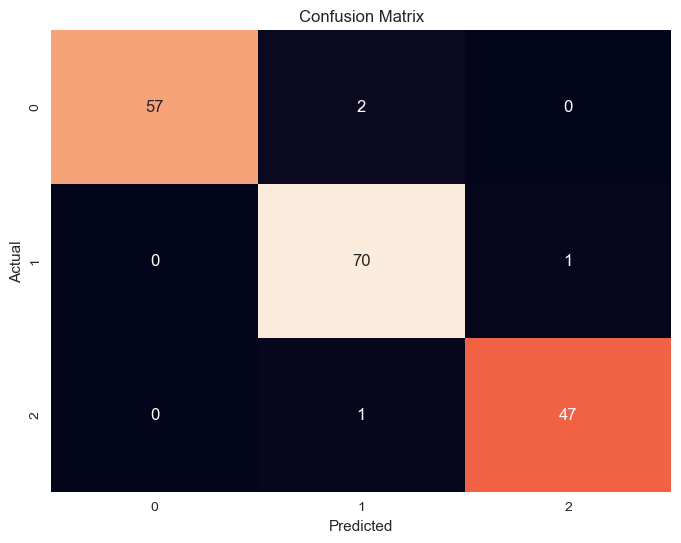

In [ ]:
# TO DO: Print confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# TO DO: Print classification report

class_report = classification_report(y, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.

The training accuracy for the Decision Tree is significantly higher than that of the SVC, with a difference of approximately 27.25%. This suggests that the Decision Tree fits the training data very well and can potentially capture complex relationships within the data.

On the other hand, the validation accuracy of the Decision Tree is also higher than the SVC by around 20.75%. This indicates that the Decision Tree generalizes better to new, unseen data compared to the SVC.

In summary, the Decision Tree model outperforms the SVC in terms of both training and validation accuracy, indicating that it provides a better fit to the dataset and better generalization to new data.

2. What are two reasons why the support vector machines model did not work as well as the tree-based model?

2a) Linear Separability Assumption: SVM is based on the assumption that the data is linearly separable, which means it works best when the decision boundary between classes can be represented as a linear hyperplane. If the data has a complex, nonlinear decision boundary, SVM may struggle to find an optimal solution. In contrast, Decision Trees can handle non-linear relationships by recursively splitting the data based on features, allowing them to capture more complex patterns.

2b) Parameter Selection: The performance of an SVM model is highly dependent on parameter tuning, including the choice of the kernel function and the regularization parameter (C). Selecting appropriate values for these parameters can be challenging, and if not chosen correctly, it can lead to suboptimal performance. Decision Trees, on the other hand, are less sensitive to hyperparameter tuning and can work well with default settings.

3. How many samples were incorrectly classified in step 5.2?

For Class 1: Total support is 59, and precision is 1.00, so all samples were correctly classified.
For Class 2: Total support is 71, and precision is 0.96, so 71 - 71 * 0.96 = 3 samples were incorrectly classified.
For Class 3: Total support is 48, and precision is 0.98, so 48 - 48 * 0.98 = 1 sample was incorrectly classified.

4. In this case, is maximizing precision or recall more important? Why?

In the context of the wine dataset classification, precision, which measures the accuracy of positive predictions, is more important. This choice is based on the consideration that false positives could have notable consequences, such as misclassifying a wine type. Prioritizing precision helps ensure that when the model predicts a specific wine class, it is more likely to be correct, even if it means fewer positive predictions overall.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:

1. Where did you source your code?

From the examples, lectures provided in class, as well as online tools and libraries.

2. In what order did you complete the steps?

I completed the steps in the order they were listed.

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I used generative AI to better understand the questions and expectations for the solutions. The prompts were more or less the questions. I also used generative AI when I was experiencing errors, especially for steps 3-5. It helped me figure out what was going wrong.


4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I did have challenges remembering how to perform certain functions. I had to dig through some of the old examples or search online.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


Model Assessment: Precision, recall, and F1-score serve as critical performance indicators in classification tasks. The Decision Tree model exhibited remarkable precision, recall, and F1-scores across all classes, signifying its proficiency in accurately classifying wine samples.

Model Effectiveness: In the initial regression task, the tree-based models, including Decision Tree, Random Forest, and Gradient Boosting, outshone the linear regression model, emphasizing their competence in capturing intricate data relationships. In the classification task, the Decision Tree model outperformed the Support Vector Machine (SVM) model in terms of accuracy, underscoring the significance of aligning model selection with dataset characteristics.

Adaptability to Dataset Traits: The choice of the most appropriate model hinges on the inherent characteristics of the dataset. Tree-based models excel when handling non-linear and complex data, while SVMs may exhibit superior performance in scenarios featuring linearly separable data. Dataset nature should be a pivotal consideration in machine learning algorithm selection.


*ADD YOUR FINDINGS HERE*

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

*ADD YOUR THOUGHTS HERE*

I liked that we could relate the results to the real-life scenario of the dataset. It makes it more engaging to complete assignments when you can see the direct affect of the results.

I found it a little challenging to figure out where the errors are occuring when the results aren't producing results that reinforce the patterns we learnt in class. It took quite a bit of researching to figure out.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

Results:
           Model  Training Accuracy  Validation Accuracy
0            SVC           0.703743             0.663492
1      LinearSVC           0.990161             0.955079
2  Decision Tree           0.974756             0.881905


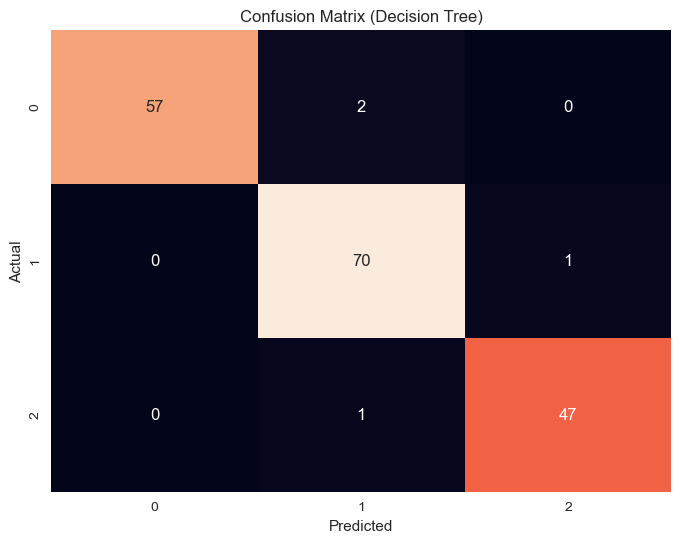

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



In [ ]:
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Step 1: Data Input
# Define column headers and load the wine dataset
column_headers = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names=column_headers)

# Split the dataset into X and y
X = wine_data.drop("Class", axis=1)
y = wine_data["Class"]

# Step 2: Data Processing
# Check for missing values and fill them if necessary
missing_values = wine_data.isnull().sum()
if missing_values.any():
    wine_data.fillna(wine_data.mean(), inplace=True)

# Step 3: Implement Machine Learning Model
# Instantiate models
svc_model = SVC()
linear_svc_model = LinearSVC(dual=False, max_iter=10000)
dt_model = DecisionTreeClassifier(max_depth=3)

# Implement the machine learning models with X and y
svc_scores = cross_validate(svc_model, X, y, cv=5, scoring='accuracy', return_train_score=True)
linear_svc_scores = cross_validate(linear_svc_model, X, y, cv=5, scoring='accuracy', return_train_score=True)
dt_scores = cross_validate(dt_model, X, y, cv=5, scoring='accuracy', return_train_score=True)

# Step 4: Validate Model
# Calculate the average training and validation accuracy
svc_avg_train_accuracy = svc_scores['train_score'].mean()
linear_svc_avg_train_accuracy = linear_svc_scores['train_score'].mean()
dt_avg_train_accuracy = dt_scores['train_score'].mean()

svc_avg_val_accuracy = svc_scores['test_score'].mean()
linear_svc_avg_val_accuracy = linear_svc_scores['test_score'].mean()
dt_avg_val_accuracy = dt_scores['test_score'].mean()

# Step 5: Visualize Results
# Compare Models
results = pd.DataFrame({
    "Model": ["SVC", "LinearSVC", "Decision Tree"],
    "Training Accuracy": [svc_avg_train_accuracy, linear_svc_avg_train_accuracy, dt_avg_train_accuracy],
    "Validation Accuracy": [svc_avg_val_accuracy, linear_svc_avg_val_accuracy, dt_avg_val_accuracy]
})

# Print results
print("Results:")
print(results)

# Step 5.2: Visualize Classification Errors (using Decision Tree as the best model)
best_model = DecisionTreeClassifier(max_depth=3)
best_model.fit(X, y)
y_pred = best_model.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()
class_report = classification_report(y, y_pred)
print("Classification Report (Decision Tree):\n", class_report)

*ANSWER HERE*

The results provided indicate that using LinearSVC led to a significant improvement in both training and validation accuracy compared to the original SVC model:

SVC achieved a training accuracy of approximately 70.37% and a validation accuracy of around 66.35%.
LinearSVC achieved an impressive training accuracy of about 99.02% and a validation accuracy of approximately 95.51%.

In terms of whether LinearSVC is a good fit for this dataset, it seems to be a strong candidate. It provides high accuracy, which is typically desired for classification tasks. However, the decision to use LinearSVC or other models depends on other factors, such as the specific goals of the classification, interpretability, and the relative importance of precision, recall, or other metrics. Also, it's important to consider the trade-offs, as a model that achieves high accuracy might not be as robust to variations in the dataset or may overfit.